In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!pwd
import os
os.chdir('/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/data')
!pwd

/content
/content/drive/.shortcut-targets-by-id/1e3wEi6JEN2h-9rVLldMe_ZneB2ThDB2_/Hepatoma-Staging-Project/Dataset/data


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [71]:
#Without split into train and test need to pre process and then only split
#If not a lot of confusion as no metadata file available will be changing the dir structure lead to complications
import pathlib
data_dir = "/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/data"
#data_dir = tf.keras.utils.get_file('data', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [72]:
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)

673


In [73]:
non_cancerous = list(data_dir.glob('NonCancerous/*'))
PIL.Image.open(str(non_cancerous[0]))
print(len(non_cancerous))

261


In [74]:
samp_1 = list(data_dir.glob('Samp1/*'))
PIL.Image.open(str(samp_1[0]))
print(len(samp_1))

57


In [75]:
batch_size = 32
img_height = 224
img_width = 224


In [88]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=539)

Found 673 files belonging to 5 classes.
Using 539 files for training.


In [89]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=134)

Found 673 files belonging to 5 classes.
Using 134 files for validation.


In [85]:
class_names = train_ds.class_names
print(class_names)

['NonCancerous', 'Samp1', 'Samp2', 'Samp3', 'Samp4']


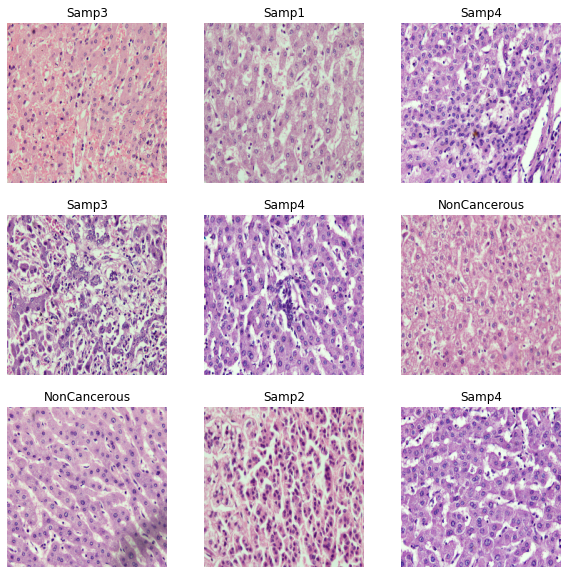

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [90]:
i=0
for image_batch, labels_batch in train_ds:
  i+=1
  print(image_batch.shape)
  print(labels_batch.shape)


(539, 224, 224, 3)
(539,)


In [81]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [102]:
#SMOTE augmentation
from imblearn.over_sampling import SMOTE
import tensorflow_datasets as tfds


img=[]
lb=[]
sm = SMOTE(random_state=12,sampling_strategy="minority")
x=tfds.as_numpy(train_ds)
#print(x.shape)
for image, label in x:
  train_rows=len(image)
  print(image.shape, label)
  image=image.reshape(train_rows,-1)
  print(image.shape)
  img.append(image)
  lb.append(label)


x_t=np.array(img)
y_t=np.array(lb)
x_t=x_t.reshape(539,150528)
y_t=y_t.reshape(539)
print(x_t.shape)
print(y_t.shape)

#x = x.reshape(train_rows,-1)
x_res, y_res = sm.fit_resample(x_t, y_t)
print(x_res.shape)
print(y_res.shape)
x_res=x_res.reshape(-1,224,224,3)
print(x_res.shape)
#print( x_res.value_counts(), np.bincount(y_res))
#print(train_ds)


(539, 224, 224, 3) [0 2 4 4 4 3 4 4 4 2 1 0 2 0 0 0 0 0 2 0 3 2 4 1 0 3 2 0 4 0 0 0 0 1 0 4 4
 4 0 1 4 4 0 2 4 0 0 3 4 3 4 0 2 4 0 0 0 4 1 2 4 2 0 1 2 1 2 3 0 0 3 2 1 4
 0 0 0 0 0 4 4 3 2 2 0 4 2 0 4 0 1 4 0 4 0 4 0 4 2 4 0 3 0 4 1 1 0 0 3 0 0
 4 0 2 4 0 1 4 3 0 3 0 0 0 0 0 3 4 4 4 1 4 4 0 4 4 4 3 2 0 1 0 4 4 3 0 4 0
 0 4 0 1 2 0 4 2 2 0 0 0 3 4 1 1 2 0 0 3 2 3 4 2 4 0 0 4 1 0 3 1 4 0 0 3 1
 2 4 3 4 4 1 0 0 0 0 1 4 0 0 4 0 2 2 0 0 1 2 0 3 3 0 0 4 0 4 0 4 2 4 0 0 0
 0 4 0 3 4 2 0 0 3 0 0 0 3 0 3 4 0 0 0 4 4 4 1 0 3 0 0 0 4 4 2 0 3 4 0 0 4
 1 1 0 4 0 4 0 0 1 0 0 3 4 1 0 4 1 3 4 0 4 3 4 3 0 0 4 0 4 0 0 0 2 0 0 4 0
 4 3 1 4 4 0 3 2 4 4 3 0 4 0 4 3 0 4 4 0 2 0 1 0 3 3 1 0 0 4 0 3 0 0 0 2 3
 4 0 0 0 2 0 0 0 1 2 2 3 2 4 0 0 0 4 0 0 2 4 0 1 0 4 4 1 4 4 1 0 3 4 0 3 2
 0 0 2 2 4 2 4 2 0 3 0 3 2 4 2 3 0 4 0 3 1 4 4 0 0 0 4 4 0 4 0 2 0 0 4 2 3
 3 3 2 0 4 0 0 1 2 0 4 3 2 3 4 0 4 3 4 4 0 4 0 1 0 0 4 4 0 0 4 0 3 2 1 0 4
 0 4 4 4 0 4 0 1 4 1 0 4 1 0 0 4 0 0 0 4 4 0 4 2 0 4 0 2 2 0 4 2 4 3 2 4 0
 4 0 2

In [103]:
#Adasyn augmentation
from imblearn.over_sampling import ADASYN
import tensorflow_datasets as tfds


img=[]
lb=[]
ada = ADASYN(random_state=12,sampling_strategy="minority")
x=tfds.as_numpy(train_ds)
#print(x.shape)
for image, label in x:
  train_rows=len(image)
  print(image.shape, label)
  image=image.reshape(train_rows,-1)
  print(image.shape)
  img.append(image)
  lb.append(label)


x_t=np.array(img)
y_t=np.array(lb)
x_t=x_t.reshape(539,150528)
y_t=y_t.reshape(539)
print(x_t.shape)
print(y_t.shape)

#x = x.reshape(train_rows,-1)
x_res, y_res = ada.fit_resample(x_t, y_t)
print(x_res.shape)
print(y_res.shape)
x_res=x_res.reshape(-1,224,224,3)
print(x_res.shape)
#print( x_res.value_counts(), np.bincount(y_res))
#print(train_ds)


(539, 224, 224, 3) [3 2 0 4 4 0 2 0 0 1 4 0 0 0 3 4 0 3 0 3 0 0 1 0 4 0 2 4 1 1 1 0 2 4 0 3 4
 0 0 2 4 3 3 1 2 4 3 0 0 4 4 4 4 4 2 0 0 1 4 0 0 4 1 0 0 2 0 3 0 0 2 1 3 0
 0 4 1 1 0 1 0 0 4 3 1 0 4 0 2 4 2 2 0 4 0 3 3 1 0 0 3 0 0 2 0 0 4 1 4 4 2
 2 0 0 4 0 4 2 4 4 3 3 0 4 0 0 0 0 2 0 0 4 1 4 2 0 0 0 4 0 1 0 1 0 4 0 0 1
 1 2 4 0 0 4 0 1 4 0 0 2 4 0 0 1 1 0 4 0 0 3 4 1 4 0 0 0 0 2 4 1 4 1 0 2 0
 0 1 0 4 4 0 1 0 0 3 0 3 4 2 2 2 4 0 3 0 0 0 4 4 0 0 2 3 0 3 3 0 4 4 2 1 3
 2 3 4 4 0 4 4 4 4 0 0 0 3 4 0 0 0 0 4 4 0 2 0 1 0 0 4 4 4 3 4 0 2 0 0 1 0
 0 4 2 0 4 2 4 2 4 0 0 0 0 0 4 0 4 0 2 4 2 4 0 0 0 2 0 4 0 4 4 3 2 4 3 4 0
 3 0 0 0 4 4 4 4 4 4 0 4 4 2 4 4 4 0 0 4 4 4 2 3 3 4 2 0 0 0 0 0 0 2 0 0 2
 3 3 0 4 3 0 2 4 3 1 4 0 0 0 4 2 0 0 0 0 2 3 4 3 0 3 2 0 0 0 1 3 0 2 4 0 0
 4 4 4 0 0 0 2 4 0 3 0 3 0 0 4 0 3 4 0 0 4 2 0 3 2 0 0 0 3 2 0 4 4 1 4 4 0
 4 4 1 3 0 4 1 3 0 0 0 1 0 2 4 0 4 4 3 0 0 3 4 1 0 4 4 2 1 4 4 0 4 0 0 4 4
 2 2 2 4 0 0 2 1 2 1 4 2 4 4 3 4 4 0 0 3 4 0 3 0 3 2 0 0 0 2 0 3 2 0 0 0 0
 3 3 4